<a href="https://colab.research.google.com/github/rbbh/ARIMA-SVR-PSO-ensemble/blob/master/30_Experiments_of_ARIMA_%2B_(SVR_%2B_PSO)_Val_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from google.colab import files

In [0]:
import io
import pandas as pd

In [47]:
uploaded = files.upload()   

Saving pollution.txt to pollution.txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['pollution.txt']))

In [49]:
uploaded = files.upload()

Saving pollution_ARIMA.txt to pollution_ARIMA.txt


In [0]:
data_ARIMA = pd.read_csv(io.BytesIO(uploaded['pollution_ARIMA.txt']))

In [51]:
uploaded = files.upload()

Saving pollution_r.txt to pollution_r.txt


In [0]:
data_r = pd.read_csv(io.BytesIO(uploaded['pollution_r.txt']))

In [53]:
data_r.describe()

,Residuo
count,$130.00
mean,$12.50
std,$424.26
min,"$-1,365.36"
25%,$-95.11
50%,$24.59
75%,$163.39
max,"$1,323.27"


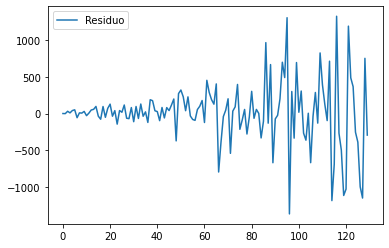

In [54]:
data_r.plot()

In [55]:
len(data)

130

In [0]:
#Scaling the data
from sklearn import preprocessing

data_r_n = data_r.copy()

data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())

data_r_n = pd.DataFrame(data_r_n)



In [57]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats 
# itself annually, 3 if it is trimestrial etc.

# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

dimensions = 12
data_cn = pd.concat([data_r_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

     Residuo  Residuo  Residuo  Residuo  ...  Residuo  Residuo  Residuo  Residuo
0      $0.51     $nan     $nan     $nan  ...     $nan     $nan     $nan     $nan
1      $0.51    $0.51     $nan     $nan  ...     $nan     $nan     $nan     $nan
2      $0.52    $0.51    $0.51     $nan  ...     $nan     $nan     $nan     $nan
3      $0.51    $0.52    $0.51    $0.51  ...     $nan     $nan     $nan     $nan
4      $0.52    $0.51    $0.52    $0.51  ...     $nan     $nan     $nan     $nan
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
125    $0.36    $0.41    $0.64    $0.69  ...    $1.00    $0.25    $0.07    $0.77
126    $0.14    $0.36    $0.41    $0.64  ...    $0.41    $1.00    $0.25    $0.07
127    $0.08    $0.14    $0.36    $0.41  ...    $0.32    $0.41    $1.00    $0.25
128    $0.79    $0.08    $0.14    $0.36  ...    $0.09    $0.32    $0.41    $1.00
129    $0.40    $0.79    $0.08    $0.14  ...    $0.13    $0.09    $0.32    $0.41

[130 rows x 13 columns]


In [58]:
# Splitting the residual data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[12:,1:]

y = data_cn.iloc[12:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3983, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5531, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))


21
26
71


In [59]:
dimensions = 12
data_c2n = pd.concat([data_ARIMA.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c2n)

        ARIMA     ARIMA     ARIMA  ...     ARIMA     ARIMA     ARIMA
0     $122.52      $nan      $nan  ...      $nan      $nan      $nan
1     $122.04   $122.52      $nan  ...      $nan      $nan      $nan
2     $133.96   $122.04   $122.52  ...      $nan      $nan      $nan
3     $138.39   $133.96   $122.04  ...      $nan      $nan      $nan
4     $131.11   $138.39   $133.96  ...      $nan      $nan      $nan
..        ...       ...       ...  ...       ...       ...       ...
125 $3,931.73 $3,447.11 $2,853.04  ... $3,366.45 $4,175.08 $4,336.60
126 $3,167.15 $3,931.73 $3,447.11  ... $4,242.83 $3,366.45 $4,175.08
127 $2,685.96 $3,167.15 $3,931.73  ... $3,928.89 $4,242.83 $3,366.45
128 $2,704.11 $2,685.96 $3,167.15  ... $2,932.00 $3,928.89 $4,242.83
129 $2,644.67 $2,704.11 $2,685.96  ... $4,664.83 $2,932.00 $3,928.89

[130 rows x 13 columns]


In [60]:
# Splitting the ARIMA predictions into train, validation and test

from sklearn.model_selection import train_test_split

X_ARIMA = data_c2n.iloc[12:,1:]

y_ARIMA = data_c2n.iloc[12:,0]

X_train_ARIMA, X_val_ARIMA, y_train_ARIMA, y_val_ARIMA = train_test_split(X_ARIMA, y_ARIMA, test_size = 0.3983, shuffle = False)

X_val_ARIMA, X_test_ARIMA, y_val_ARIMA, y_test_ARIMA = train_test_split(X_val_ARIMA, y_val_ARIMA, test_size = 0.5531, shuffle = False)

print(len(y_val_ARIMA))
print(len(y_test_ARIMA))
print(len(y_train_ARIMA))

21
26
71


In [61]:
dimensions = 12
data_c3n = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c3n)

            X         X         X  ...         X         X         X
0     $122.64      $nan      $nan  ...      $nan      $nan      $nan
1     $120.89   $122.64      $nan  ...      $nan      $nan      $nan
2     $164.69   $120.89   $122.64  ...      $nan      $nan      $nan
3     $147.17   $164.69   $120.89  ...      $nan      $nan      $nan
4     $171.70   $147.17   $164.69  ...      $nan      $nan      $nan
..        ...       ...       ...  ...       ...       ...       ...
125 $3,542.54 $3,193.02 $3,218.42  ... $2,677.06 $2,990.66 $5,048.39
126 $2,169.85 $3,542.54 $3,193.02  ... $5,566.10 $2,677.06 $2,990.66
127 $1,536.50 $2,169.85 $3,542.54  ... $3,661.68 $5,566.10 $2,677.06
128 $3,454.94 $1,536.50 $2,169.85  ... $2,435.28 $3,661.68 $5,566.10
129 $2,351.18 $3,454.94 $1,536.50  ... $3,550.43 $2,435.28 $3,661.68

[130 rows x 13 columns]


In [62]:
# Splitting the raw data into train, validation and test

from sklearn.model_selection import train_test_split

X_raw = data_c3n.iloc[12:,1:]

y_raw = data_c3n.iloc[12:,0]

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size = 0.3983, shuffle = False)

X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_val_raw, y_val_raw, test_size = 0.5531, shuffle = False)

print(len(y_val_raw))
print(len(y_test_raw))
print(len(y_train_raw))

21
26
71


In [0]:
def pso(n_particles, iterations, dimensions, inertia, k_best_particles, experiments):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    

    # Initializing regression variables    
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    # Initializing variables for experiment collection
    g_bests = []
    g_bests_RGS_experiment = []
    mse_residuals = []
    final_experiment_predictions = []

    last_configurations = []
    
    average_particles = []
    mse_averages = []
    final_experiment_averages = []

    median_particles = []
    mse_medians = []
    final_experiment_medians = []

    average_k_best_predictions = []
    mse_averages_k_best = []
    final_experiment_k_averages = []

    median_k_best_predictions = []
    mse_medians_k_best = []
    final_experiment_k_medians = []
    
    mse_ARIMA = []
    mse_ensemble = []


    from sklearn.metrics import mean_squared_error

    for e in range(experiments):
      
        # Initializing particles' positions randomly, inside
        # the search space
        x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
        y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
        z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

        c = np.concatenate((x,y,z), axis=1)

        if(e == 0):
            # Displaying tridimensional search space
            plot(c)

        # Initializing particles' parameters
        v = np.zeros((n_particles, dimensions))
        c1 = 2
        c2 = 2
        p_best = np.zeros((n_particles, dimensions))
        p_best_val = np.zeros(n_particles) + sys.maxsize  
        g_best = np.zeros(dimensions)
        g_best_val = sys.maxsize

        best_iter = np.zeros(iterations)

        for i in range(iterations):

            for j in range(n_particles):
              
                # Starting Regression
                rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

                # Fitting the curve
                rgs.fit(X_train, y_train)
                y_predict = rgs.predict(X_val)

                # Using Mean Squared Error to verify prediction accuracy
                mse = mean_squared_error(y_val, y_predict) 

                # If mse value for that search point, for that particle,
                # is less than its personal best point,
                # replace personal best
                if(mse < p_best_val[j]):   
                    # The value below represents the current least Mean Squared Error
                    p_best_val[j] = mse
                    
                    # The value below represents the current least Regressor
                    p_best_RGS[j] = rgs
                                

                    # The value below represents the current search coordinates for
                    # the particle's current least Mean Squared Error found
                    p_best[j] = c[j].copy()
                    
                # Using auxiliar variable to get the index of the
                # particle that found the configuration with the 
                # minimum MSE value
                aux = np.argmin(p_best_val)        
              
                if(p_best_val[aux] < g_best_val):
                    # Assigning Particle's current best MSE to the Group's best    
                    g_best_val = p_best_val[aux]

                    # Assigning Particle's current best configuration to the Group's best
                    g_best = p_best[aux].copy()

                    # Group best regressor:
                    # the combination of C, Epsilon and Gamma
                    # that computes the best fitting curve
                    g_best_RGS = p_best_RGS[aux]

              
                rand1 = np.random.random()
                rand2 = np.random.random()

                # The variable below influences directly the particle's velocity.
                # It can either make it smaller or bigger. 
                w = inertia

                # The equation below represents Particle's velocity, which is
                # the rate of change in its position
                v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

                # Change in the Particle's position 
                c[j] = c[j] + v[j]

                # Below is a series of conditions that stop the particles from
                # leaving the search space
                if(c[j][2] < min_g):
                  c[j][2] = min_g
                if(c[j][2] > max_g):
                  c[j][2] = max_g
                if(c[j][1] < min_e):
                  c[j][1] = min_e
                if(c[j][1] > max_e):
                  c[j][1] = max_e
                if(c[j][0] < min_c):
                  c[j][0] = min_c
                if(c[j][0] > max_c):
                  c[j][0] = max_c
                
        
        # Storing last particles` positions
        # for later use
        last_configurations.append(c)

        # Making the prediction with the best configuration of C, Epsilon and
        # Gamma found by the particles
        predict_test = g_best_RGS.predict(X_val)

        g_bests_RGS_experiment.append(g_best_RGS)
        g_bests.append(g_best)

        mse_r = mean_squared_error(y_val, predict_test)
        mse_residuals.append(mse_r)

    
        # Taking all particles' final predictions,
        # getting their averages and medians and
        # getting the k best subset of particles
        # to see the final prediction without outliers
        k = k_best_particles
        average_p, median_p, av_k_best_p, md_k_best_p = particles_last_predictions(c, n_particles, k)

        average_particles.append(average_p)
        median_particles.append(median_p)
        average_k_best_predictions.append(av_k_best_p)
        median_k_best_predictions.append(md_k_best_p)
        
        mse_e, mse_AR = residual_performance(predict_test, y_val_ARIMA, y_val_raw)

        # Storing the Ensemble's (final system) mse
        mse_ARIMA.append(mse_AR)
        mse_ensemble.append(mse_e)

        # Storing the mse of the average predictions
        mse_A, mse_AR = residual_performance(average_p, y_val_ARIMA, y_val_raw)
        mse_averages.append(mse_A)

        # Storing the mse of the average k best predictions
        mse_A_k_best, mse_AR = residual_performance(av_k_best_p, y_val_ARIMA, y_val_raw)
        mse_averages_k_best.append(mse_A_k_best)

        # Storing the mse of the median predictions
        mse_M, mse_AR = residual_performance(median_p, y_val_ARIMA, y_val_raw)
        mse_medians.append(mse_M)

        # Storing the mse of the median k best predictions
        mse_M_k_best, mse_AR = residual_performance(md_k_best_p, y_val_ARIMA, y_val_raw)
        mse_medians_k_best.append(mse_M_k_best)

        # Getting the final results of the current experiment
        # and storing them
        final_exp_p, final_exp_av, final_exp_md, final_exp_av_k, final_exp_md_k = results(g_best_RGS, average_p, median_p, av_k_best_p, md_k_best_p)

        final_exp_p = final_exp_p.tolist()
        final_exp_av = final_exp_av.tolist()
        final_exp_md = final_exp_md.tolist()
        final_exp_av_k = final_exp_av_k.tolist()
        final_exp_md_k = final_exp_md_k.tolist()

        final_experiment_predictions.append(final_exp_p)
        final_experiment_averages.append(final_exp_av)
        final_experiment_medians.append(final_exp_md)
        final_experiment_k_averages.append(final_exp_av_k)
        final_experiment_k_medians.append(final_exp_md_k)

        print('\nExperiment # %d: done. MSE_g_Best: %f; MSE_AV: %f; MSE_MD: %f; MSE_k_AV: %f; MSE_k_MD: %f\n'%(e+1, mse_e, mse_A, mse_M, mse_A_k_best, mse_M_k_best)) 


    aux_result_1 = np.argmin(mse_ensemble)
    mse_final = mse_ensemble[aux_result_1]

    #print('Debug 1')

    aux_result_2 = np.argmin(mse_residuals)
    best_regression = g_bests_RGS_experiment[aux_result_2]
    best_configuration = g_bests[aux_result_2]

    c = last_configurations[aux_result_2]

    probable_best_predictions = final_experiment_predictions[aux_result_2]

    corresponding_average = final_experiment_averages[aux_result_2]
    corresponding_median = final_experiment_medians[aux_result_2]

    corresponding_k_average = final_experiment_k_averages[aux_result_2]
    corresponding_k_median = final_experiment_k_medians[aux_result_2]

    #print('Debug 2')

    display_results(best_regression, probable_best_predictions, 
                    corresponding_average, corresponding_median,
                    corresponding_k_average, corresponding_k_median,c)

    #print('Debug 3')

    #final_experiment_predictions_T = list(map(list, zip(*final_experiment_predictions)))
    #final_experiment_averages_T = list(map(list, zip(*final_experiment_averages)))
    #final_experiment_medians_T = list(map(list, zip(*final_experiment_medians)))
    #final_experiment_k_averages_T = list(map(list, zip(*final_experiment_k_averages)))
    #final_experiment_k_medians_T = list(map(list, zip(*final_experiment_k_medians)))

    final_experiment_predictions_concat = [item for sublist in final_experiment_predictions for item in sublist] 
    final_experiment_averages_concat = [item for sublist in final_experiment_averages for item in sublist]
    final_experiment_medians_concat = [item for sublist in final_experiment_medians for item in sublist]
    final_experiment_k_averages_concat = [item for sublist in final_experiment_k_averages for item in sublist]
    final_experiment_k_medians_concat = [item for sublist in final_experiment_k_medians for item in sublist]


    print(color.BOLD + '\nBest Result: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1+1, mse_final) + color.BOLD )  


    pd.options.display.float_format = '${:,.2f}'.format
    final_results = pd.DataFrame()

    
    final_results["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat
    final_results["Previsoes com as Medias"] = final_experiment_averages_concat
    final_results["Previsoes com as Medianas"] = final_experiment_medians_concat
    final_results["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat
    final_results["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat
    
    final_mse = pd.DataFrame()
    
    final_mse["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse["MSE da Previsao do Sistema Final"] = mse_ensemble
    final_mse["MSE da Previsao das Medias"] = mse_averages
    final_mse["MSE da Previsao das Medianas"] = mse_medians
    final_mse["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best
    final_mse["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best
    final_mse["MSE da Previsao do ARIMA"] = mse_ARIMA


    final_results.to_csv("Val_Pollution_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse.to_csv("Val_MSE_Pollution_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

In [0]:
def display_results(configuration, final_predictions, 
                    final_predictions_average, final_predictions_median, 
                    final_predictions_k_average, final_predictions_k_median, all_particles):

    from sklearn.metrics import mean_squared_error
    
    data = y_val_raw
    ARIMA = y_val_ARIMA

    plot(all_particles)

    mse_ARIMA = mean_squared_error(ARIMA, data)
    mse = mean_squared_error(final_predictions, data)
    mse_A = mean_squared_error(final_predictions_average, data)
    mse_M = mean_squared_error(final_predictions_median, data)
    mse_k_A = mean_squared_error(final_predictions_k_average, data)
    mse_k_M = mean_squared_error(final_predictions_k_median, data)

    print('\nMean Squared Error for the ARIMA Model:\t %f' %mse_ARIMA)
    print('\nBest Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse)
    print('\nMean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_A)
    print('\nMean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_A)   
    print('\nMean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_M)
    print('\nMean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_M)


    print('\nBest Configuration Found:\n')
    print(configuration)

    print('\n')
    print('\n')
    print(color.BOLD + '\nARIMA Model series` predicitions:\n' + color.BOLD)

    plot_results(ARIMA)  


    print(color.BOLD + '\nEnsemble Model series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions)


    print(color.BOLD + '\nEnsemble Model best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_average)

    
    print(color.BOLD + '\nEnsemble Model K best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_average)


    print(color.BOLD + '\nEnsemble Model best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_median)

    
    print(color.BOLD + '\nEnsemble Model K best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_median)

    print('\n')
    print('\n')

In [0]:
def results(regression, average, median, k_average, k_median):
    
    import numpy as np

    data = y_val_raw
    ARIMA = y_val_ARIMA
    ARIMA = ARIMA.to_list()
    test = X_val

    average_residuals = average
    median_residuals = median

    k_average_residuals = k_average
    k_median_residuals = k_median
    #print('Debug Inside 1')

    #print(regression)
    
    tmp = regression.predict(test)
    #print('Debug Inside 2')


    residuals = tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A = average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M = median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A_k = k_average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M_k = k_median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

    final_predictions = ARIMA + residuals
    final_predictions_average = ARIMA + residuals_A
    final_predictions_median = ARIMA + residuals_M
    final_predictions_average_k = ARIMA + residuals_A_k
    final_predictions_median_k = ARIMA + residuals_M_k
    #print('Debug Inside 3')

    
    return final_predictions, final_predictions_average, final_predictions_median, final_predictions_average_k, final_predictions_median_k


In [0]:
def residual_performance(residual_predictions, ARIMA_predictions, raw_data):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st


    r_tmp = residual_predictions
    ARIMA = ARIMA_predictions
    data = raw_data

    # Un-scalling the residuals
    
    r = r_tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

        
    final_predictions = r + ARIMA
  

    mse1 = mean_squared_error(final_predictions, data)

    mse2 = mean_squared_error(ARIMA, data)
    

    return mse1, mse2

In [0]:
def particles_last_predictions(configurations, particles, k):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st
    
    predictions = []
    mse = []

    for p in range(particles):

        rgs = svm.SVR(C = configurations[p][0], epsilon = configurations[p][1], gamma = configurations[p][2])

        rgs.fit(X_train, y_train) 
        y_predict = rgs.predict(X_val) 

        mse.append(mean_squared_error(y_predict, y_val))
        predictions.append(y_predict)
    
    #print('Debug inside 1')

    total = [sum(x) for x in zip(*predictions)]
    #print('Debug inside 2')  
    
    average = [num/particles for num in total]
    #print('Debug inside 3')

    median = [st.median(num) for num in zip(*predictions)]

    predictions = np.array(predictions)
    id_k = np.argpartition(mse, k)
    k_best_pred = predictions[id_k[:k]]

    k_total = [sum(x) for x in zip(*k_best_pred)]

    av_k_best_pred = [num/k for num in k_total]

    md_k_best_pred = [st.median(num) for num in zip(*k_best_pred)]
    #print('Debug inside 5')


    return average, median, av_k_best_pred, md_k_best_pred

In [0]:
def plot_results(predictions):

    plt.plot(range(len(y_val_raw)), y_val_raw, label='Real')
    plt.plot(range(len(predictions)), predictions, label='Predicted')
    plt.legend()
    plt.show()

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [0]:
# Function that displays tridimensional plot
def plot(some_list):
 
    ax = Axes3D(plt.figure())
    ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'b')
    ax.set_xlabel('$C$', fontsize = 20)
    ax.set_ylabel('$\epsilon$', fontsize = 25)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
    ax.zaxis._axinfo['label']['space_factor'] = 1.0
    plt.show()

    print('\n')
    print('\n')

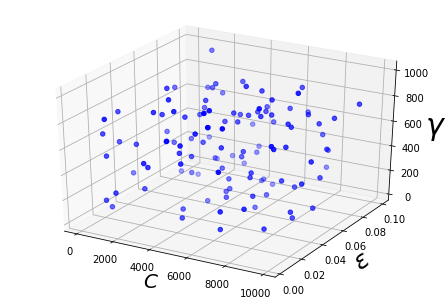






Experiment # 1: done. MSE_g_Best: 245284.498454; MSE_AV: 262702.743393; MSE_MD: 249811.110460; MSE_k_AV: 248569.980569; MSE_k_MD: 248641.897132


Experiment # 2: done. MSE_g_Best: 239827.332759; MSE_AV: 262373.000167; MSE_MD: 258662.330033; MSE_k_AV: 243354.552569; MSE_k_MD: 244211.055278


Experiment # 3: done. MSE_g_Best: 240220.436120; MSE_AV: 264093.265786; MSE_MD: 258640.584291; MSE_k_AV: 244146.411083; MSE_k_MD: 245183.726899


Experiment # 4: done. MSE_g_Best: 239893.047597; MSE_AV: 264644.697643; MSE_MD: 259678.003987; MSE_k_AV: 243494.456366; MSE_k_MD: 243608.324576


Experiment # 5: done. MSE_g_Best: 240227.681106; MSE_AV: 263641.985607; MSE_MD: 259219.637896; MSE_k_AV: 243398.973426; MSE_k_MD: 243735.202143



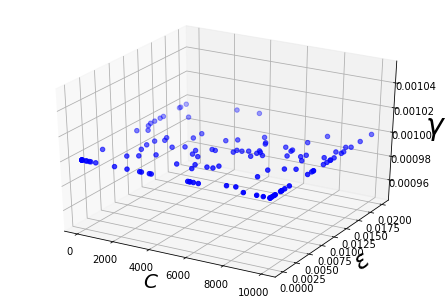






Mean Squared Error for the ARIMA Model:	 346424.193584

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 239827.332759

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 262373.000167

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 243354.552569

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 258662.330033

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 244211.055278

Best Configuration Found:

SVR(C=4852.280143495029, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.007570500871872677, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



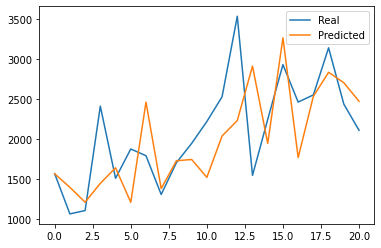


Ensemble Model series` predicitions:



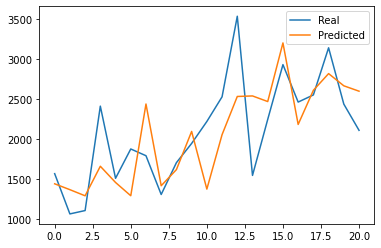


Ensemble Model best Average series` predicitions:



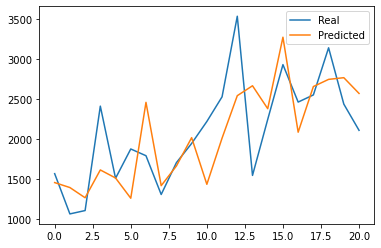


Ensemble Model K best Average series` predicitions:



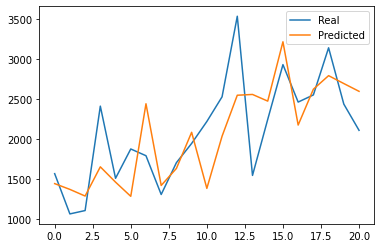


Ensemble Model best Median series` predicitions:



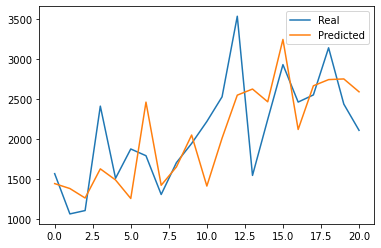


Ensemble Model K best Median series` predicitions:



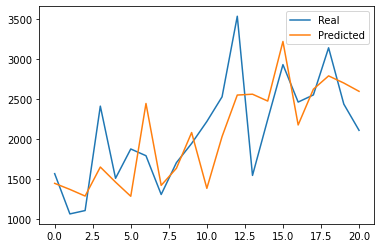






Best Result: Experiment # 2 . Mean Squared Error = 239827.332759



In [71]:
pso(120, 100, 3, 1, 5, 5)

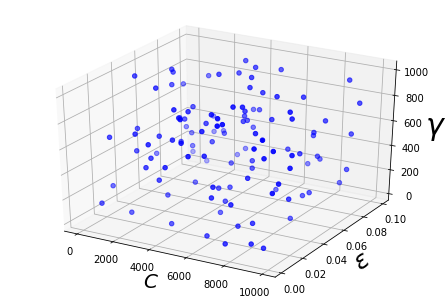






Experiment # 1: done. MSE_g_Best: 242423.333657; MSE_AV: 259092.733313; MSE_MD: 259494.957665; MSE_k_AV: 246187.761497; MSE_k_MD: 246064.336042


Experiment # 2: done. MSE_g_Best: 241376.531813; MSE_AV: 259749.275106; MSE_MD: 259033.555003; MSE_k_AV: 244400.086205; MSE_k_MD: 244852.094190


Experiment # 3: done. MSE_g_Best: 240661.120220; MSE_AV: 260452.324609; MSE_MD: 257574.283998; MSE_k_AV: 245233.282862; MSE_k_MD: 245416.848073


Experiment # 4: done. MSE_g_Best: 240508.584036; MSE_AV: 258998.687200; MSE_MD: 258097.193482; MSE_k_AV: 244254.718537; MSE_k_MD: 244638.792942


Experiment # 5: done. MSE_g_Best: 240712.249188; MSE_AV: 259736.358174; MSE_MD: 257899.896708; MSE_k_AV: 244781.027415; MSE_k_MD: 245109.497359



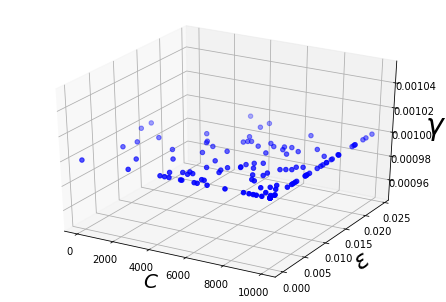






Mean Squared Error for the ARIMA Model:	 346424.193584

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 240508.584036

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 258998.687200

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 244254.718537

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 258097.193482

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 244638.792942

Best Configuration Found:

SVR(C=7491.7400493520445, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.007812987277681059, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



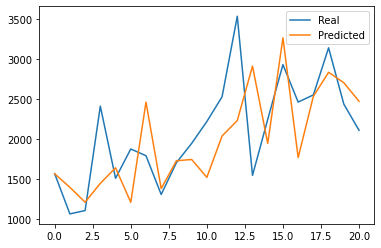


Ensemble Model series` predicitions:



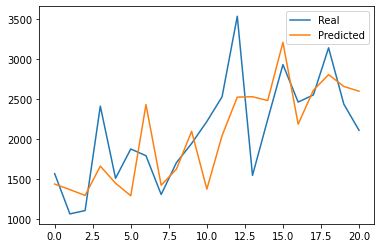


Ensemble Model best Average series` predicitions:



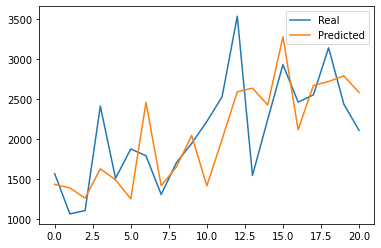


Ensemble Model K best Average series` predicitions:



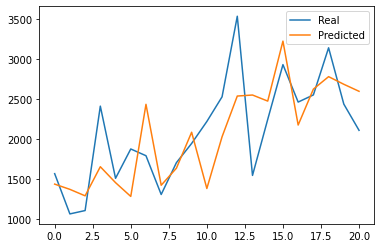


Ensemble Model best Median series` predicitions:



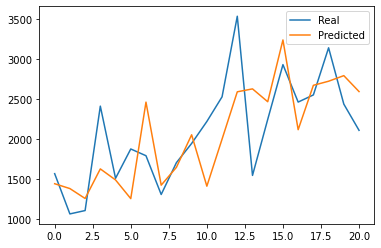


Ensemble Model K best Median series` predicitions:



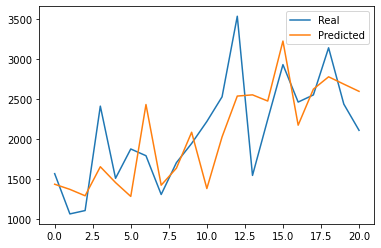






Best Result: Experiment # 4 . Mean Squared Error = 240508.584036



In [72]:
pso(120, 100, 3, 1, 10, 5)

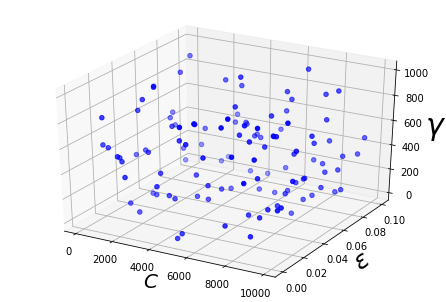






Experiment # 1: done. MSE_g_Best: 241201.881820; MSE_AV: 259052.752427; MSE_MD: 257433.240855; MSE_k_AV: 245625.579206; MSE_k_MD: 245526.825036


Experiment # 2: done. MSE_g_Best: 240676.338678; MSE_AV: 259491.237398; MSE_MD: 258272.687762; MSE_k_AV: 245355.361616; MSE_k_MD: 245572.123189


Experiment # 3: done. MSE_g_Best: 239932.806012; MSE_AV: 261131.407931; MSE_MD: 258149.285230; MSE_k_AV: 245673.752500; MSE_k_MD: 246295.365009


Experiment # 4: done. MSE_g_Best: 245466.054364; MSE_AV: 267730.862487; MSE_MD: 249978.490429; MSE_k_AV: 248798.242473; MSE_k_MD: 248929.382937


Experiment # 5: done. MSE_g_Best: 239055.765559; MSE_AV: 264545.525693; MSE_MD: 259495.124145; MSE_k_AV: 245809.035521; MSE_k_MD: 246201.707907



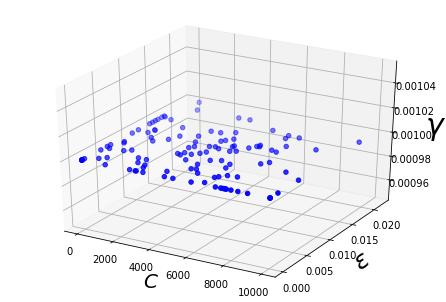






Mean Squared Error for the ARIMA Model:	 346424.193584

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 239055.765559

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 264545.525693

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 245809.035521

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 259495.124145

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 246201.707907

Best Configuration Found:

SVR(C=3534.649199742065, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.007446031172035904, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



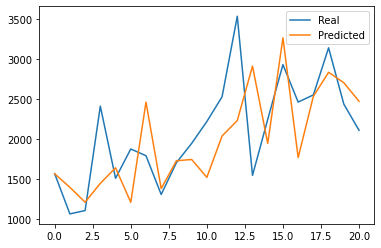


Ensemble Model series` predicitions:



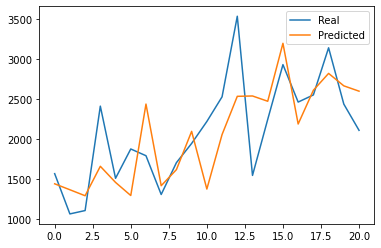


Ensemble Model best Average series` predicitions:



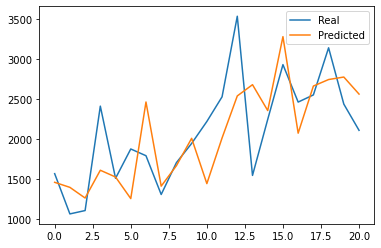


Ensemble Model K best Average series` predicitions:



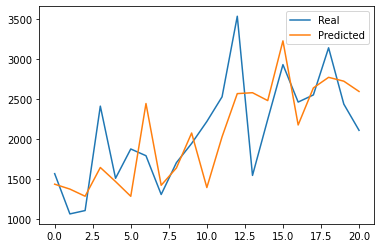


Ensemble Model best Median series` predicitions:



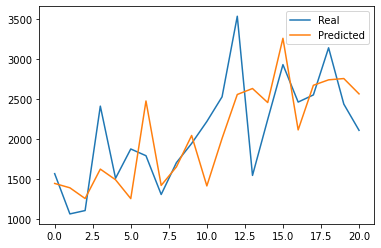


Ensemble Model K best Median series` predicitions:



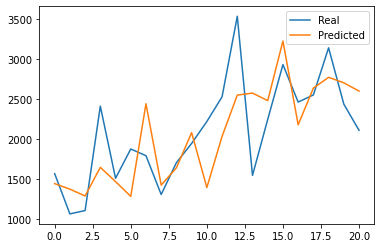






Best Result: Experiment # 5 . Mean Squared Error = 239055.765559



In [73]:
pso(120, 100, 3, 1, 20, 5)

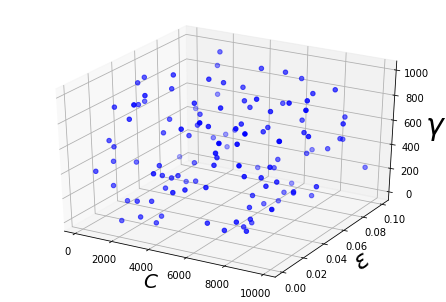






Experiment # 1: done. MSE_g_Best: 239211.131721; MSE_AV: 268384.534595; MSE_MD: 259707.648906; MSE_k_AV: 248191.818440; MSE_k_MD: 249404.059046


Experiment # 2: done. MSE_g_Best: 240422.354584; MSE_AV: 258036.845987; MSE_MD: 257413.474945; MSE_k_AV: 246918.965580; MSE_k_MD: 247968.156407


Experiment # 3: done. MSE_g_Best: 240661.306258; MSE_AV: 268636.700558; MSE_MD: 261480.707949; MSE_k_AV: 248944.783289; MSE_k_MD: 250076.010238


Experiment # 4: done. MSE_g_Best: 240304.082541; MSE_AV: 267297.257483; MSE_MD: 260289.446671; MSE_k_AV: 247070.359378; MSE_k_MD: 247940.992436


Experiment # 5: done. MSE_g_Best: 245097.887762; MSE_AV: 272178.627280; MSE_MD: 250991.144166; MSE_k_AV: 248968.977212; MSE_k_MD: 248926.951137



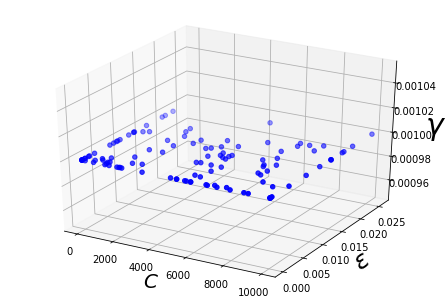






Mean Squared Error for the ARIMA Model:	 346424.193584

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 239211.131721

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 268384.534595

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 248191.818440

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 259707.648906

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 249404.059046

Best Configuration Found:

SVR(C=4299.303078210461, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.007401058829982175, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



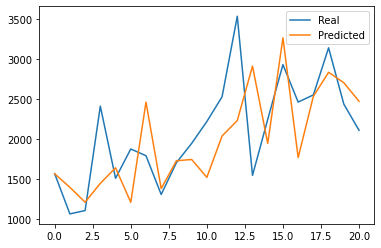


Ensemble Model series` predicitions:



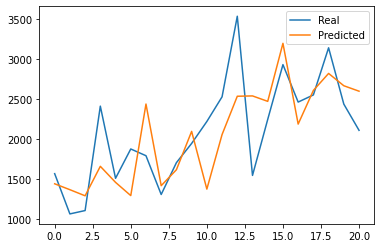


Ensemble Model best Average series` predicitions:



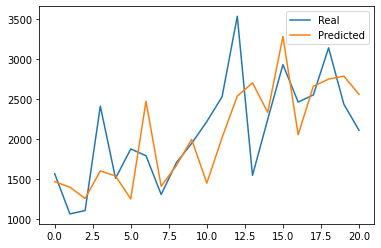


Ensemble Model K best Average series` predicitions:



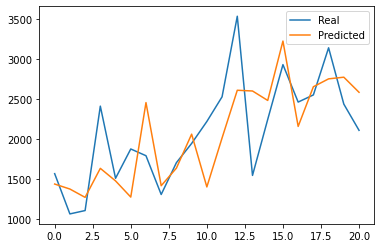


Ensemble Model best Median series` predicitions:



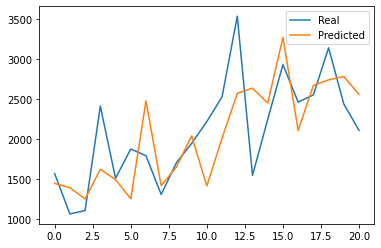


Ensemble Model K best Median series` predicitions:



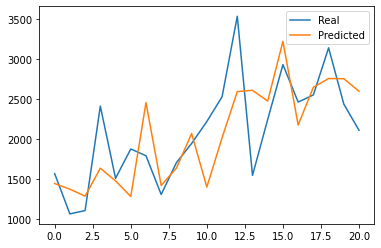






Best Result: Experiment # 1 . Mean Squared Error = 239211.131721



In [74]:
pso(120, 100, 3, 1, 30, 5)

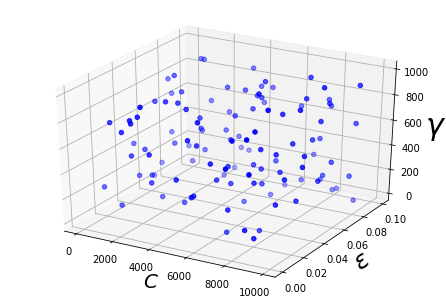






Experiment # 1: done. MSE_g_Best: 239712.609408; MSE_AV: 262502.547342; MSE_MD: 257732.834971; MSE_k_AV: 247549.750847; MSE_k_MD: 250504.426533


Experiment # 2: done. MSE_g_Best: 242493.177155; MSE_AV: 257746.614533; MSE_MD: 258023.714062; MSE_k_AV: 248548.085460; MSE_k_MD: 250008.093236


Experiment # 3: done. MSE_g_Best: 240006.977837; MSE_AV: 268609.304518; MSE_MD: 258837.836494; MSE_k_AV: 248258.398708; MSE_k_MD: 249236.825742


Experiment # 4: done. MSE_g_Best: 240224.149747; MSE_AV: 259689.307162; MSE_MD: 256626.606593; MSE_k_AV: 248439.095130; MSE_k_MD: 250645.956959


Experiment # 5: done. MSE_g_Best: 240480.495814; MSE_AV: 266053.356455; MSE_MD: 260474.692317; MSE_k_AV: 248278.087482; MSE_k_MD: 249179.733281



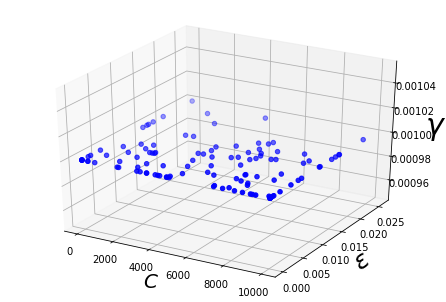






Mean Squared Error for the ARIMA Model:	 346424.193584

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 239712.609408

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 262502.547342

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 247549.750847

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 257732.834971

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 250504.426533

Best Configuration Found:

SVR(C=4095.707721363401, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.007361732405579203, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



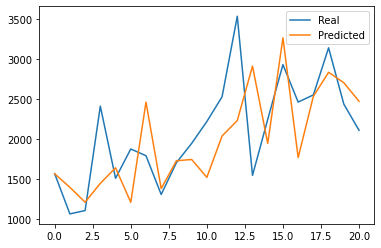


Ensemble Model series` predicitions:



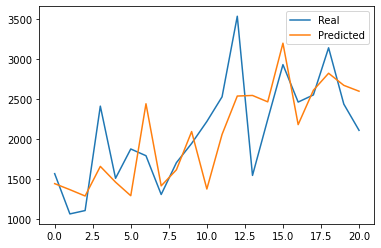


Ensemble Model best Average series` predicitions:



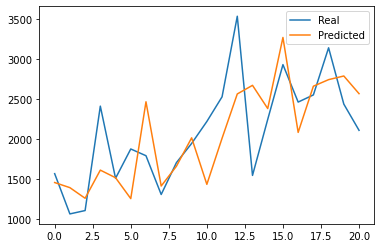


Ensemble Model K best Average series` predicitions:



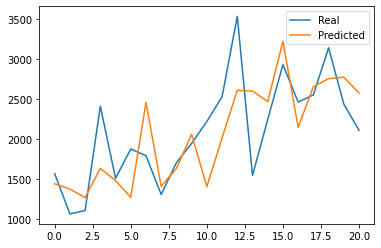


Ensemble Model best Median series` predicitions:



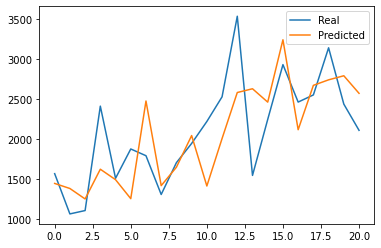


Ensemble Model K best Median series` predicitions:



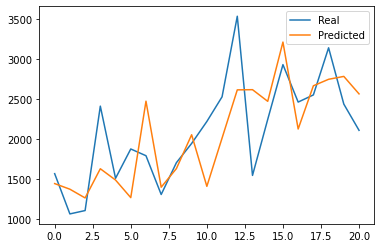






Best Result: Experiment # 1 . Mean Squared Error = 239712.609408



In [75]:
pso(120, 100, 3, 1, 40, 5)

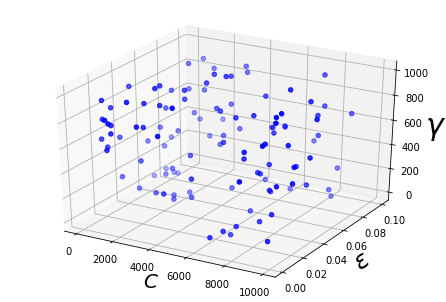






Experiment # 1: done. MSE_g_Best: 240005.738816; MSE_AV: 265937.407521; MSE_MD: 260010.905853; MSE_k_AV: 248830.786159; MSE_k_MD: 249868.024024


Experiment # 2: done. MSE_g_Best: 240220.804958; MSE_AV: 265920.405320; MSE_MD: 260016.213108; MSE_k_AV: 248710.085543; MSE_k_MD: 250622.322162


Experiment # 3: done. MSE_g_Best: 240078.069994; MSE_AV: 265317.469751; MSE_MD: 261244.186495; MSE_k_AV: 249597.939792; MSE_k_MD: 250388.869209


Experiment # 4: done. MSE_g_Best: 239762.038110; MSE_AV: 267513.081823; MSE_MD: 260221.476376; MSE_k_AV: 248780.924033; MSE_k_MD: 251377.748601


Experiment # 5: done. MSE_g_Best: 239603.553097; MSE_AV: 263222.590082; MSE_MD: 258486.016475; MSE_k_AV: 248287.040807; MSE_k_MD: 249550.554400



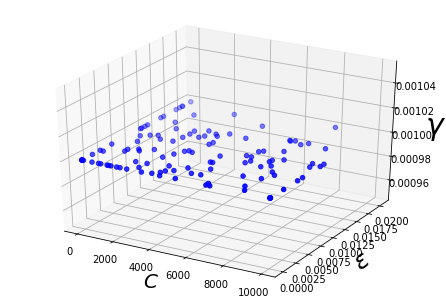






Mean Squared Error for the ARIMA Model:	 346424.193584

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 239603.553097

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 263222.590082

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 248287.040807

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 258486.016475

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 249550.554400

Best Configuration Found:

SVR(C=3685.1068169746113, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.007318332953585897, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



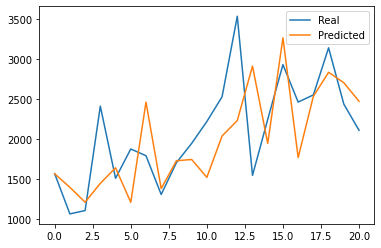


Ensemble Model series` predicitions:



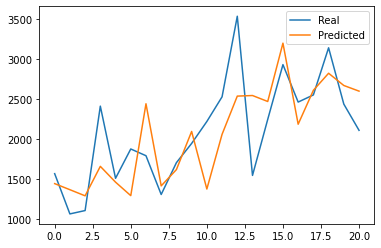


Ensemble Model best Average series` predicitions:



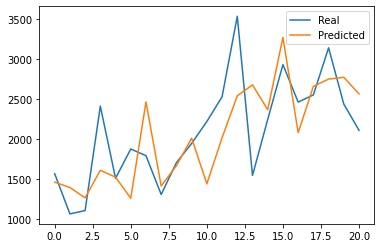


Ensemble Model K best Average series` predicitions:



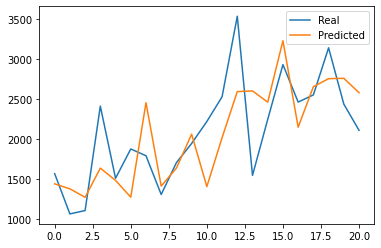


Ensemble Model best Median series` predicitions:



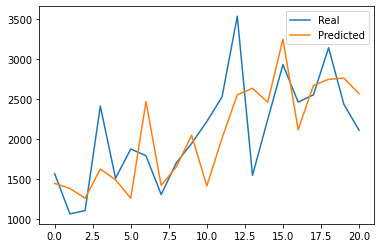


Ensemble Model K best Median series` predicitions:



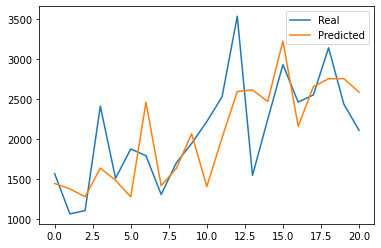






Best Result: Experiment # 5 . Mean Squared Error = 239603.553097



In [76]:
pso(120, 100, 3, 1, 50, 5)

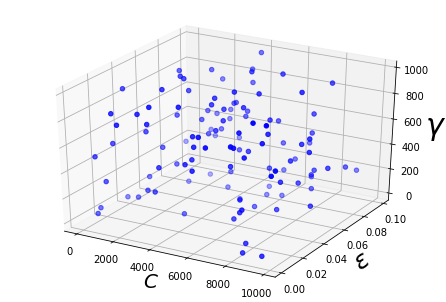






Experiment # 1: done. MSE_g_Best: 240212.798671; MSE_AV: 259157.510078; MSE_MD: 258578.699417; MSE_k_AV: 248847.123498; MSE_k_MD: 250099.378208


Experiment # 2: done. MSE_g_Best: 239787.021079; MSE_AV: 273354.004466; MSE_MD: 261581.223664; MSE_k_AV: 250885.120339; MSE_k_MD: 251092.181488


Experiment # 3: done. MSE_g_Best: 240254.066132; MSE_AV: 266425.116438; MSE_MD: 259035.273515; MSE_k_AV: 249151.866732; MSE_k_MD: 249773.381216


Experiment # 4: done. MSE_g_Best: 245389.251144; MSE_AV: 263001.761544; MSE_MD: 249970.486731; MSE_k_AV: 249401.418866; MSE_k_MD: 249362.829461


Experiment # 5: done. MSE_g_Best: 245731.110989; MSE_AV: 269064.373086; MSE_MD: 253454.969575; MSE_k_AV: 249654.801102; MSE_k_MD: 249857.896922



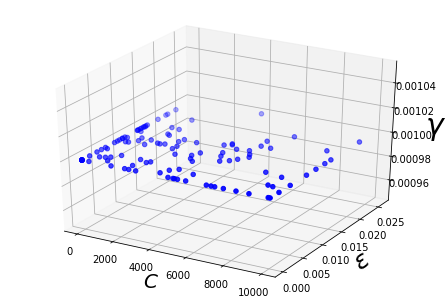






Mean Squared Error for the ARIMA Model:	 346424.193584

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 239787.021079

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 273354.004466

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 250885.120339

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 261581.223664

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 251092.181488

Best Configuration Found:

SVR(C=2206.7287605456468, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.007137943805461052, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



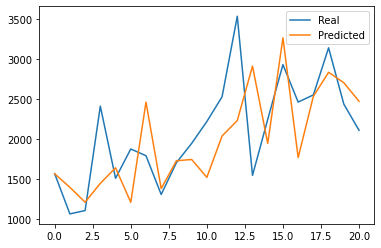


Ensemble Model series` predicitions:



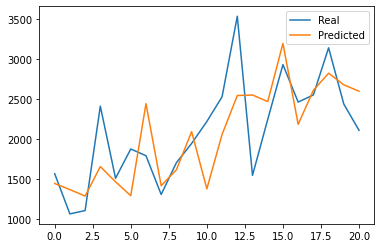


Ensemble Model best Average series` predicitions:



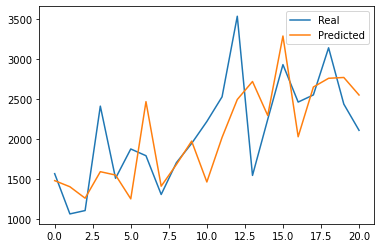


Ensemble Model K best Average series` predicitions:



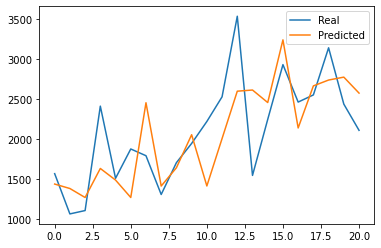


Ensemble Model best Median series` predicitions:



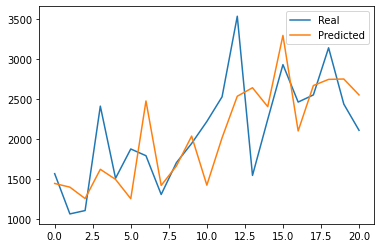


Ensemble Model K best Median series` predicitions:



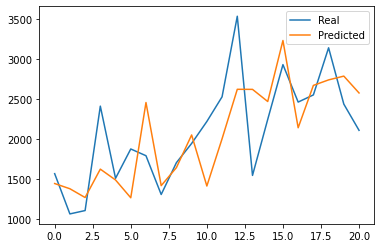






Best Result: Experiment # 2 . Mean Squared Error = 239787.021079



In [77]:
pso(120, 100, 3, 1, 60, 5)